# Übungsblatt 3



## Aufgabe 4

In [175]:
import numpy as np
import matplotlib.pyplot as plt 
import math 
from objdict import ObjDict

### Aufgabe 4.1

In [176]:
s = ObjDict()
s.E = 35e9  
s.d = 0.8  
s.l = 20  
s.F = 2e6  
s.rho = 2500  
s.g = 9.81  
s.C = 1.75e7*np.pi*s.d  
s.S = 120e6
s.A = np.pi * (s.d / 2)**2
s.EA = s.E * s.A  
s.n = s.g * s.rho * s.A


### Aufgabe 4.2

0.0030476010142790337
0.001878489519906103
-2000000.0
-225418.7423887324


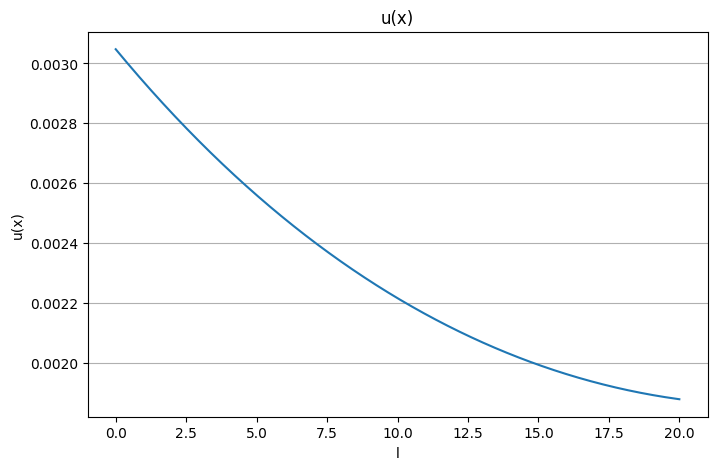

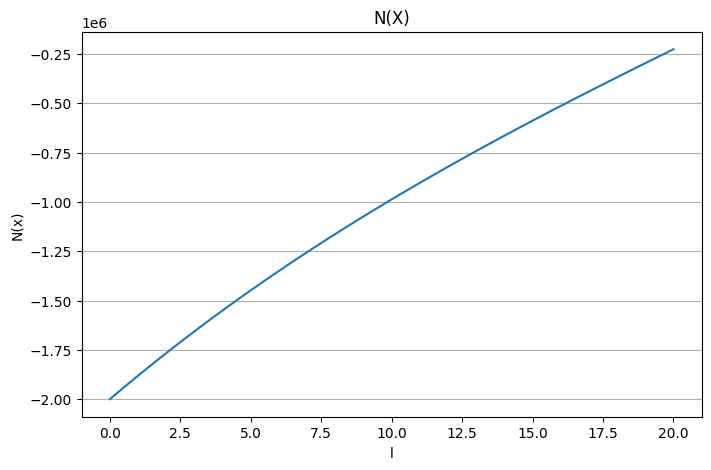

In [177]:
a1 = 3+7*np.pi
a2 = 7*np.pi-3

def u(x, a1, a2):
    u = (
        (math.exp(-x / 20) / (3500000 * np.pi * (a1 * math.exp(2) - a2))) *
        ((25000 * (a1 * math.exp(2) + a2 * math.exp(x / 10))) -
         2943 * np.pi * math.exp(1) * (math.exp(x / 10) + 1) +
         981 * np.pi * math.exp(x / 20) * (a1 * math.exp(2) - a2)))
    return u

def Nf(x, a1, a2):
    N = (
    -(80*math.exp(-x/20)/(a1*math.exp(2)-a2))*
    (25000*(a1*math.exp(2)-a2*math.exp(x/10))
     +2943*np.pi*math.exp(1)*(math.exp(x/10)-1))
    )
    return N 

xR = np.linspace(0, s.l, 1000)
uR = []
NR = []

for x in xR:
    u_value = u(x, a1, a2)
    N_value = Nf(x, a1, a2)
    uR.append(u_value)
    NR.append(N_value)

uR = np.array(uR)
NR = np.array(NR)

print(u(0,a1,a2))
print(u(20,a1,a2))
print(Nf(0,a1,a2))
print(Nf(20,a1,a2))

plt.figure(figsize=(8, 5))
plt.plot(xR,uR)
plt.xlabel('l')
plt.ylabel('u(x)')
plt.title('u(x)')  
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(xR,NR)
plt.xlabel('l')
plt.ylabel('N(x)')
plt.title('N(X)')  
plt.grid(axis='y')
plt.show()


### Aufgabe 4.3

K_ij = K_EA_ij + K_c_ij + K_s_ij

K_EA_ij = EA+(int0-l(phii'*phij'))


In [178]:
def pileFEM(s,k):
    
    N = k + 1
    h = s.l / k
    
    def band_matrix(ecke, diagonale, rand, k):
        doben = np.full(k-1, rand)
        dmitte = np.full(k, diagonale)
        dmitte[0] = ecke
        dmitte[-1] = ecke
        dunten = np.full(k-1, rand)
        
        A = np.diag(dmitte) + np.diag(doben, k=1) + np.diag(dunten, k=-1)
        return A

    K_EA = (s.EA / h) * band_matrix(1,2,-1,k+1)
    K_C = h * (s.C / 6) * band_matrix(2,4,1,k+1)

    K_S = np.zeros([N,N])
    K_S[-1,-1] = s.S
    K = K_EA + K_C + K_S

    rn = np.ones(k+1)
    rn[1:-1] = 2
    rn = rn * (h * s.n)/2
    rF = np.zeros(k+1)
    rF[0]+= s.F
    r = rn + rF

    uHatK = np.linalg.solve(K,r)
    xK = np.linspace (0, s.l, k+1)
    return [xK, uHatK]


### Aufgabe 4.4

Näherungslösung für k = 2,4,8,...,256 Elemente

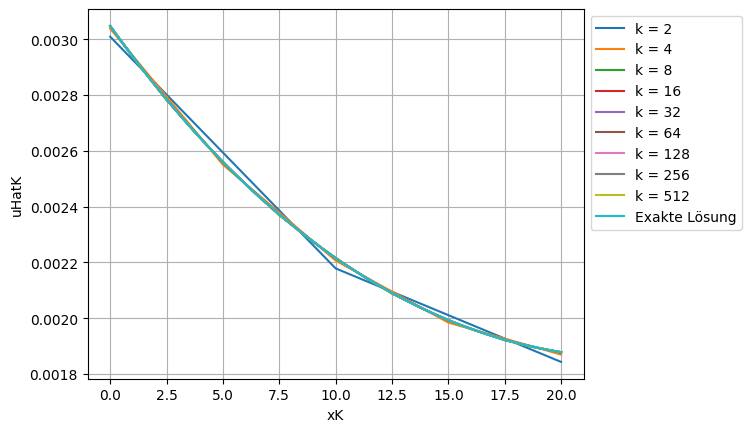

In [179]:
k = 2 ** np.array(range(1, 10))  

for i in k:
    xK, uHatK = pileFEM(s, i)
    plt.plot(xK, uHatK, label=f"k = {i}")
plt.plot(xR, uR, label="Exakte Lösung")
plt.xlabel("xK")
plt.ylabel("uHatK")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



### Aufgabe 4.5

Fehlerfunktion ek(x) = u(x) - ukh(x) für k = 2,4,8,...,256


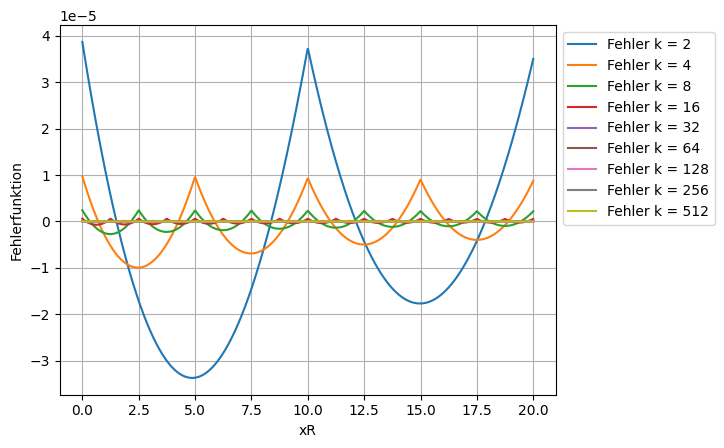

In [180]:
k = 2 ** np.array(range(1, 10)) 
xR = np.linspace(0, 20, 1000)

for i in k:
    xK, uHatK = pileFEM(s, i)
    yR_interp = np.interp(xR, xK, uHatK)
    y_error = uR-yR_interp
    plt.plot(xR, y_error,label=f"Fehler k = {i}")
plt.xlabel("xR")
plt.ylabel("Fehlerfunktion")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### Aufgabe 4.6

Plotten des maximalen Fehlers

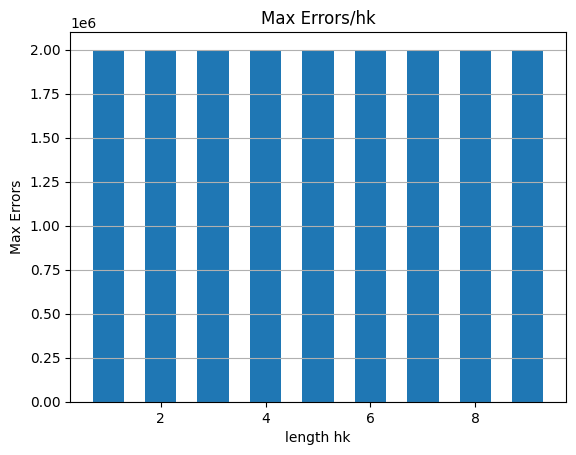

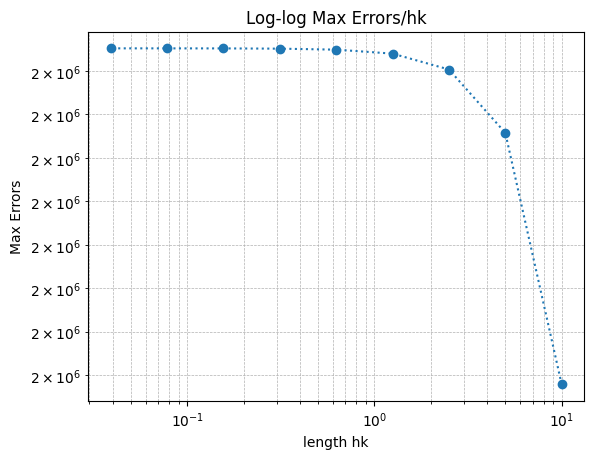

In [181]:
k = 2 ** np.array(range(1, 10)) 
max_errors = []
hk = []


for i in k:
    xK, uHatK = pileFEM(s, i)
    a1 = 3+7*np.pi
    a2 = 7*np.pi-3
    N = len(xK)
    M = 1000*(N-1)+1
    xf = np.linspace(xK[0],xK[-1],M)
    u_v = []
    for j in xf:   
        yf = Nf(j,a1,a2)
        u_v.append(yf)
    yh_interp = np.interp(xf, xK, uHatK)
    abs_diff = np.abs(u_v - yh_interp)
    max_error = np.max(abs_diff)
    hk_i = (s.l/i)
    hk.append(hk_i)
    max_errors.append(max_error)

plt.bar(np.arange(1, len(hk)+ 1), max_errors, width=0.6)
plt.xlabel('length hk')
plt.ylabel('Max Errors')
plt.title('Max Errors/hk')  
plt.grid(axis='y')
plt.show()

plt.loglog(hk,max_errors, marker='o', linestyle='dotted')
plt.xlabel('length hk')
plt.ylabel('Max Errors')
plt.title('Log-log Max Errors/hk')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.show()


### Aufgabe 4.7

Plotten der Normalkraft

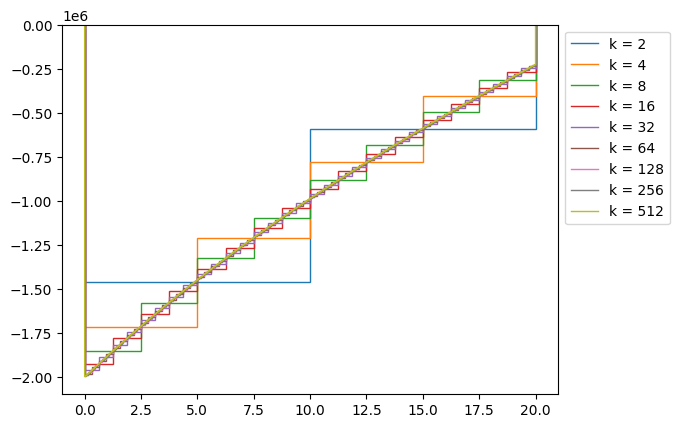

In [182]:
k = 2 ** np.array(range(1, 10)) 

for i in k:
    h = s.l/i
    xk, uHatK = pileFEM(s,i)
    uHatK_d = np.diff(uHatK) / h 
    N = s.EA * uHatK_d
    plt.stairs(values = N, edges = xk, label =f"k = {i}")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


